In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

n_tup = (5, 10, 20)
space = np.linspace(0, 10, 1000)
TETA = 1

In [10]:
class norm_mix_gen(sts.rv_continuous):
    def _pdf(self, x, TETA):
        e_t = np.exp(1/(2*(TETA)**2))
        return 0.5*(sts.norm.pdf(x, loc=0, scale=1) + sts.norm.pdf(x, loc=TETA, scale=e_t))
norm_mix = norm_mix_gen(name='norm_mix')

class norm_gamma_gen(sts.rv_continuous):
    def _pdf(self, x, TETA):
        e_t = np.exp(np.exp(-TETA)/2)
        return 0.5*(sts.norm.pdf(x, loc=TETA, scale=e_t) + sts.gamma.pdf(x, 5, scale=5))
norm_gamma = norm_gamma_gen(a=0, name='norm_gamma')

In [11]:
def likehood_1(TETA, n, sample):
    L = 1
    for i in range(n):
        L = L * norm_mix.pdf(sample[i], TETA)
    return L

In [12]:
def likehood_2(TETA, n, sample):
    L = 1
    for i in range(n):
        L = L * norm_gamma.pdf(sample[i], TETA)
    return L

C:\Users\khore\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


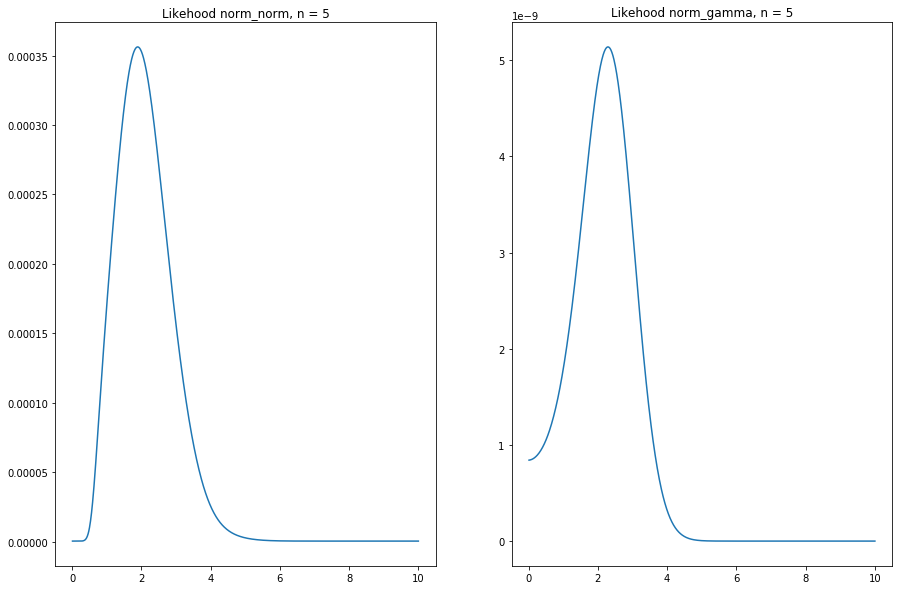

C:\Users\khore\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for n in n_tup:
    figure = plt.figure(figsize=(15,10))
    figure.tight_layout(pad=3.0)
    sample = norm_mix.rvs(TETA, size=n)
    plt.subplot(1, 2, 1)
    plt.plot(space, likehood_1(space, n, sample))
    plt.title('Likehood norm_norm, n = ' + str(n))
    
    sample = norm_gamma.rvs(TETA, size=n)
    plt.subplot(1, 2, 2)
    plt.plot(space, likehood_2(space, n, sample))
    plt.title('Likehood norm_gamma, n = ' + str(n))
    
    plt.show()